# Data Analysis and Research Proposal by Femi Sulyman

Analytic Report

   This Analytic Report and Research Proposal is based on datasets from 2 Mercedes Benz dealership 
within the same dealer group. Both stores are within 20 mile of each other.

    The dataset I would be using contains sold vehicle data from the last 90 days from both 
the 2 Mercedes Benz dealership; 
For this report,  Dealership 1 will be referred to as; MBHoffmanEstate and  
Dealership 2 will be referred to as; MBOrlandPark.

   This dataset  is relevant because it can provide insight into the sales of both dealerships.
These insights allow the dealerships maximize profits and reduce losses. 

   At the end of the report I hope the be able to answer the following questions about vehicles 
sold in the last 90 days;

1. What is the most sold vehicle year?
2. What are the top 3 vehicle models sold at both stores?
3. What is the most sort out class of vehicles?


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statistics

In [26]:
df = pd.DataFrame()
df = pd.read_csv('MBHoffmanEstates.csv')
df.head()

,Vehicle,Year,Class,Body_type,Age,Body,Color,Price,Valuation,Water
0,2016 Mercedes-Benz CLA 250 4MATIC®,2016,Car,Compact,1,4D Sedan,Grey,NaN,NaN,NaN
1,2017 Audi A6 quattro,2017,Car,Luxury High,1,4D Sedan,NaN,NaN,NaN,NaN
2,2017 Acura MDX 3.5L SH-AWD w/Technology Package,2017,SUV,Intermediate Sport Utility,1,4D Sport Utility,NaN,NaN,NaN,NaN
3,2019 Mercedes-Benz GLC 300 4MATIC®,2019,SUV,Luxury Sport Utility,1,4D Sport Utility,Black,NaN,NaN,NaN
4,2019 Mercedes-Benz C-Class C 43 AMG® 4MATIC®,2019,Car,Luxury Sport,1,4D Sedan,Black,"$71,440",NaN,NaN


In [27]:
df1 = pd.DataFrame()
df1 = pd.read_csv('MBOrlandPark.csv')
df1.head()

,Vehicle,Year,Class,Body_type,Age,Body,Color,Price,Valuation,Water
0,2018 Mercedes-Benz E-Class E 300 4MATIC®,2018,Car,Luxury High,1,4D Sedan,Gray,"$64,550","$55,143","$7,843"
1,2018 Mercedes-Benz C-Class C 300 4MATIC®,2018,Car,Intermediate,2,4D Sedan,White,"$56,050","$48,861","$16,236"
2,2016 Mercedes-Benz GLC 300 4MATIC®,2016,SUV,Luxury Sport Utility,2,4D Sport Utility,Black,NaN,"$30,398","($1,252)"
3,2019 Mercedes-Benz GLE 400 4MATIC®,2019,SUV,Intermediate Sport Utility,2,4D Sport Utility,White,NaN,"$60,306",NaN
4,2018 Mercedes-Benz E-Class E 300 4MATIC®,2018,Car,Luxury High,2,4D Sedan,White,NaN,"$61,553","$14,603"


First, I want to determine the average days in inventory each dealership has their vehicles 
for before it’s sold within a 90 day period.

In [5]:
df.Age = df.Age.apply(lambda x:x.replace(',',''))

In [6]:
df.Age = df.Age.astype(int)

In [7]:
# MBHoffmanEstate - Average Days in inventory of sold vehicles is 59.28 days

sum(df['Age']) / len(df['Age'])
np.mean(df['Age'])

59.27896995708154

In [8]:
# MBOrlandPark - Average Days in inventory of sold vehicles is 68.97 days

sum(df1['Age']) / len(df1['Age'])
np.mean(df1['Age'])

68.9702380952381

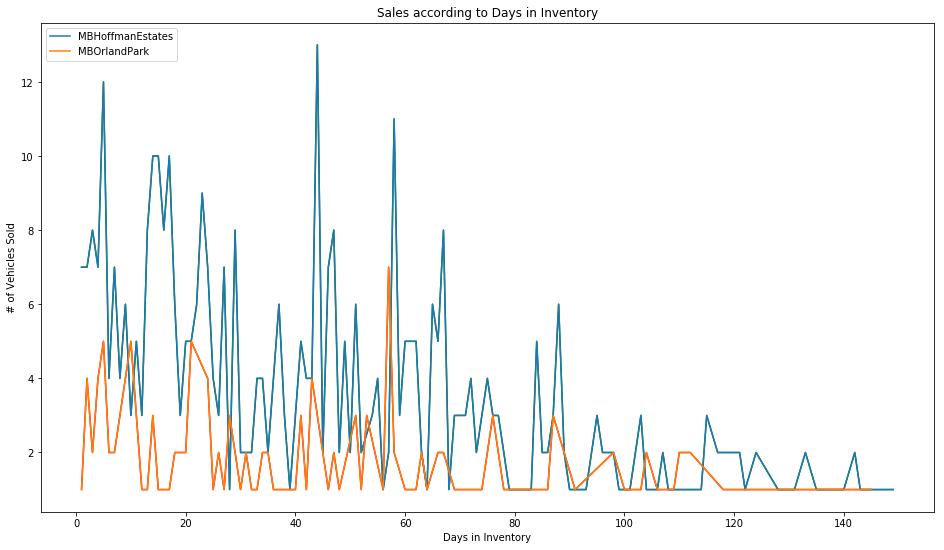

In [9]:
df_age = df[df['Age']<=150]
df1_age = df1[df1['Age']<=150]

plt.figure(figsize=(16, 9))

plt.plot(df_age.groupby('Age').size(), color='green')
plt.plot(df1_age.groupby('Age').size(), color='red')

plt.title('Sales according to Days in Inventory')
plt.ylabel('# of Vehicles Sold')
plt.xlabel('Days in Inventory')

plt.plot(df_age.groupby('Age').size(), label ='MBHoffmanEstates')
plt.plot(df1_age.groupby('Age').size(), label='MBOrlandPark')
plt.legend(loc='upper left')
plt.show()

The Data shows the difference in days in inventory of both dealerships.
As stated above, MBHoffmanEstate has vehicles with fewer days in invenotry that were sold in the last 90 days (Less days in inventory is a positive).

In [10]:
# Vehicle color of the most sold vehicles in MB Hoffman Estates

statistics.mode(df['Color'])

'Black'

In [11]:
# Vehicle color of the most sold vehicles in MB Orland Park

statistics.mode(df1['Color'])

'Black'

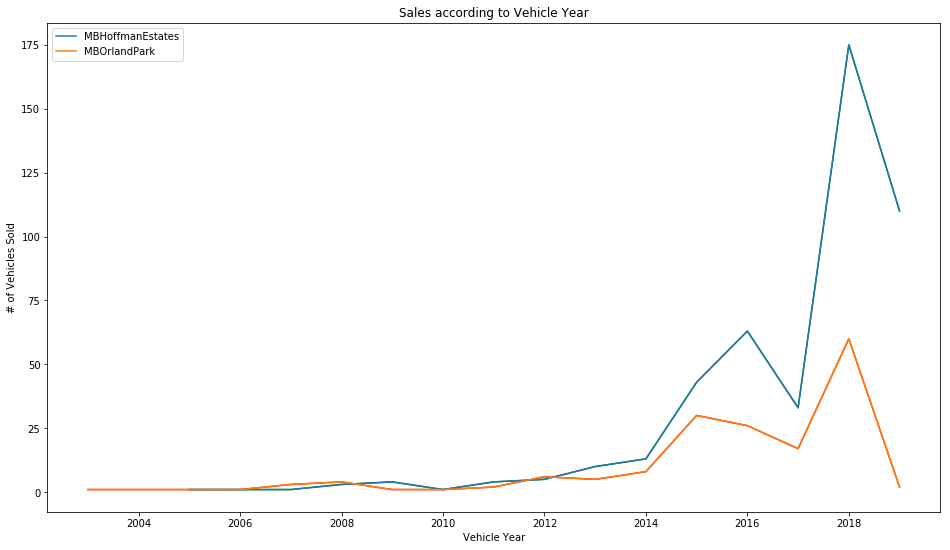

In [24]:
plt.figure(figsize=(16, 9))
plt.plot(df.groupby('Year').size(), color='green')
plt.plot(df1.groupby('Year').size(), color='red')
plt.title('Sales according to Vehicle Year')
plt.ylabel('# of Vehicles Sold')
plt.xlabel('Vehicle Year')
plt.plot(df.groupby('Year').size(), label ='MBHoffmanEstates')
plt.plot(df1.groupby('Year').size(), label='MBOrlandPark')
plt.legend(loc='upper left')
plt.show()

The most bought 'vehicle year' vehicle is 2018. 
This is not too surprising considering both dealerships have more New vehicles than Used vehicles.
There were 175 '2018 vehicle year' vehicles sold at the MBHoffmanEstates store and 60 sold at the MBOrlandPark store.

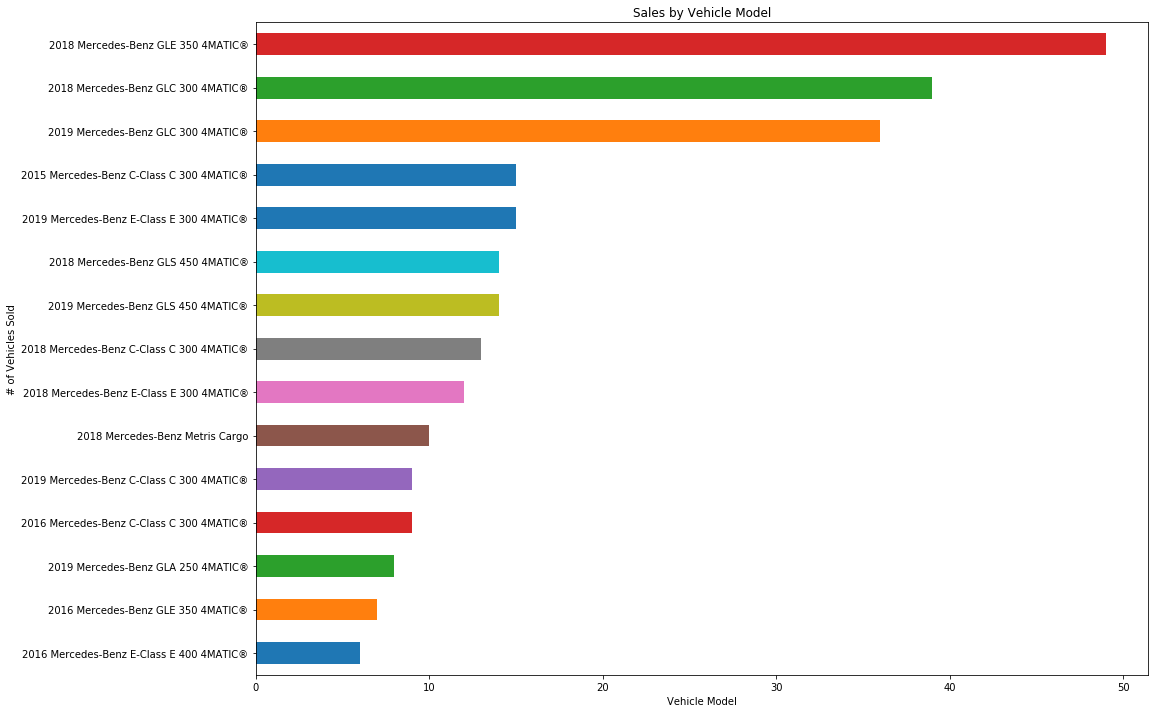

In [14]:
df_vehicle = df.groupby('Vehicle').size()
df['Vehicle'].value_counts().head(15).sort_values().plot(kind='barh', figsize=(16,12))

plt.title('Sales by Vehicle Model')
plt.ylabel('# of Vehicles Sold')
plt.xlabel('Vehicle Model')
plt.show()

   Top 3 vehicle models sold in the last 90 days at MBHoffmanEstate is the 2018 Mercedes-Benz GLE 350 4MATIC® (49 vehicles), the 2018 Mercedes-Benz GLC 300 4MATIC® (39 vehicles) and then the 2019  Mercedes-Benz GLC 300 4MATIC® (36 vehicles)


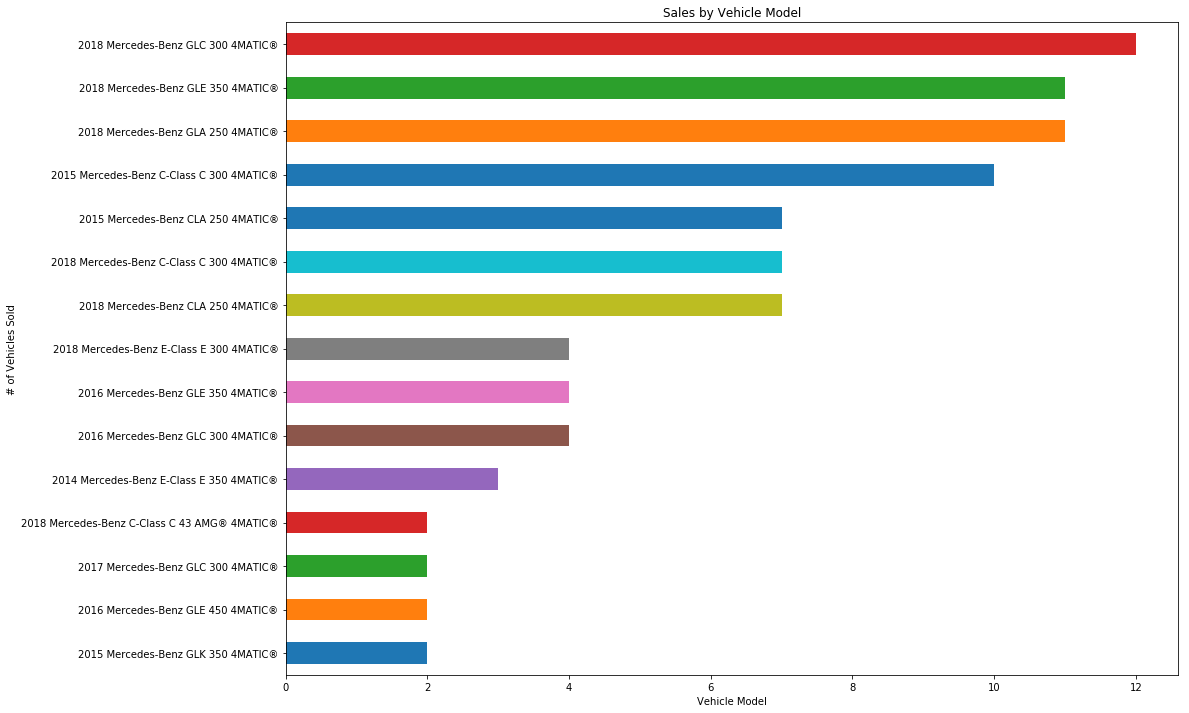

In [15]:
df1_vehicle = df1.groupby('Vehicle').size()
df1['Vehicle'].value_counts().head(15).sort_values().plot(kind='barh', figsize=(16,12))

plt.title('Sales by Vehicle Model')
plt.ylabel('# of Vehicles Sold')
plt.xlabel('Vehicle Model')
plt.show()

   Top 15 vehicle models sold in the last 90 days at MBOrlandPark is the 2018 Mercedes-Benz GLC 300 4MATIC® (12 vehicles), the 2018 Mercedes-Benz GLE 350 4MATIC® (11 vehicles)and then
the 2018 Mercedes-Benz GLA 250 4MATIC® (11 vehicles) 

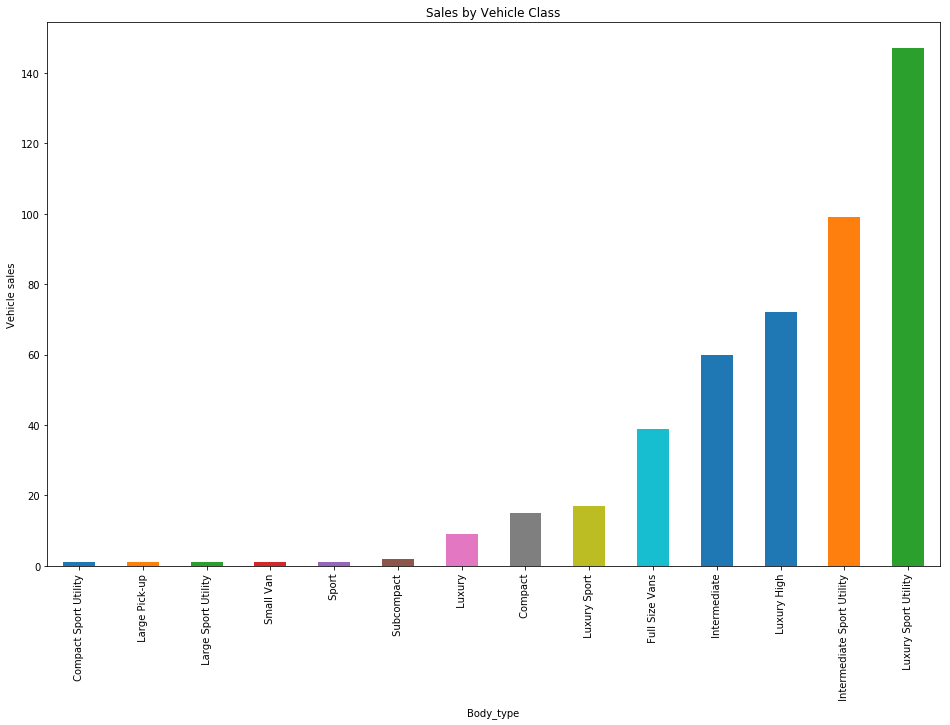

In [22]:
df_class = df.groupby('Body_type').size()
df_class.sort_values().plot(kind='bar', figsize=(16,10))

plt.title('Sales by Vehicle Class')
plt.ylabel('Vehicle sales')
plt.xlabel('Body_type')
plt.show()

   In, recent times it has been reported by several car magazines that the midsize SUV is the most sold vehicle segment, but the data shows that at both dealerships the LUXURY SPORTS UTILITY Vehicle made the most sales.
147 luxury sport untility vehicle were sold at MBHoffmanEstate
48 luxury sport untility vehicle were sold at MBOrlandPark

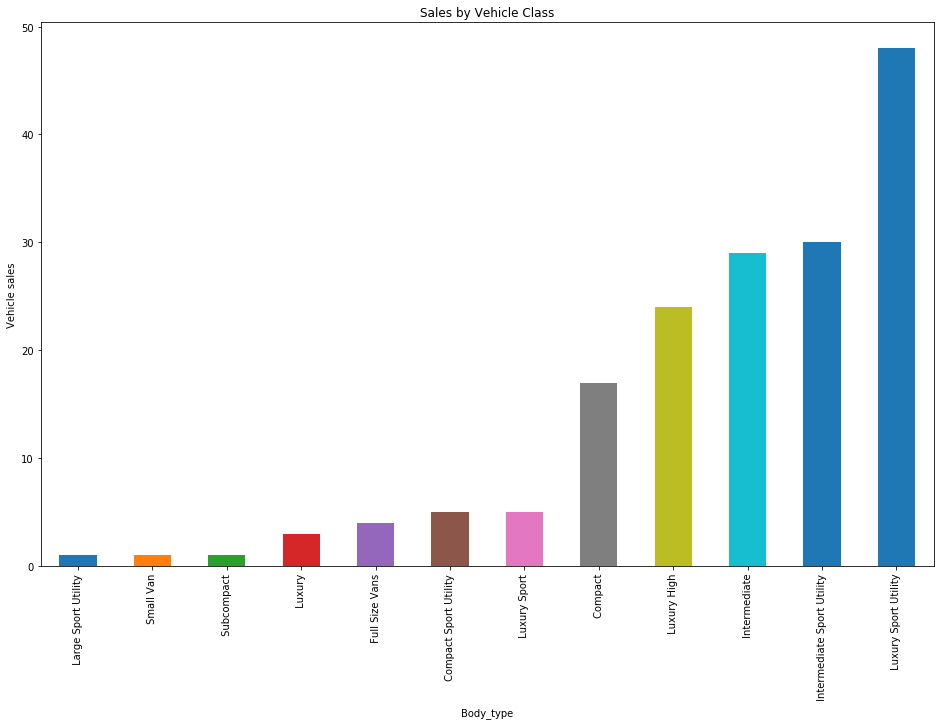

In [23]:
df1_class = df1.groupby('Body_type').size()
df1_class.sort_values().plot(kind='bar', figsize=(16,10))

plt.title('Sales by Vehicle Class')
plt.ylabel('Vehicle sales')
plt.xlabel('Body_type')
plt.show()

   In comparing the sales of both dealerships, MBHoffmanEstate out sold MBOrlandPark but the
trend of the ‘vehicle years’ sold are quite similar. As stated earlier, the 2018 vehicles
had the most sales.

In [18]:
# Total number of sold vehicles at MBHoffmanEstates = 466

df['Vehicle'].count()

466

In [19]:
# Total number of sold vehicles at MBOrlandPark = 168

df1['Vehicle'].count()

168

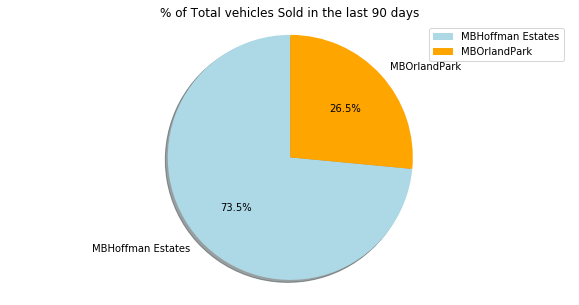

In [21]:


labels = ['MBHoffman Estates', 'MBOrlandPark']
colors = ['lightblue','orange']
number_vehicles = [466, 168]

plt.figure(figsize=(10, 5))
plt.pie(number_vehicles, labels=labels, colors=colors, shadow=True, startangle=90, autopct='%.1f%%')
plt.axis('equal')
plt.title('% of Total vehicles Sold in the last 90 days')
plt.legend(labels, )
plt.show()



Summary

   The dataset from both dealerships provided a lot of useful data about sale from the last 90 
days. One is able to see the difference in sales between Mercedes Benz of Hoffman Estates and 
Mercedes Benz of Orland Park. The sales from both store was 466 and 168 respectively.

   The number of days in inventory on an average is lower at the Hoffman Estate dealership compared
to the Orland Park dealership. Hoffman Estate averages approximately 10 days less than Orland Park.

   The most sold vehicle color is Black. The top selling vehicles are luxury sports utility vehicles,
specifically the 2018 Mercedes-Benz GLE 350 4MATIC®  and the 2018 Mercedes-Benz GLC 300 4MATIC®.


Research Proposal

   The future research project I would like to work on based on this dataset would be to predict 
future sale for both dealerships and and the best price point for the top 3 sold vehicles at 
the dealerships.

At the completion of the future project i should be able to predict the top 2 selling vehicle
models and the ideal selling prices to sell the current top 3 sold vehicles within 30 days in 
inventory.

I believe i would be able to answer the proposed questions using a predictive model i would 
learn in future course in the bootcamp.
